In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation
import warnings
warnings.filterwarnings('ignore')

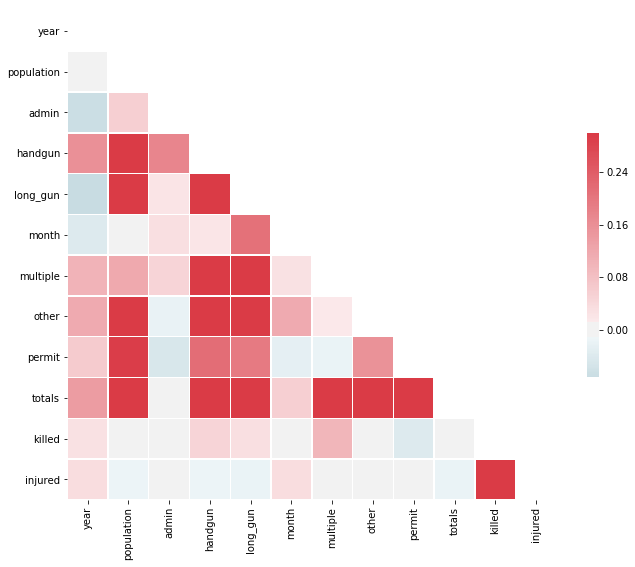

In [2]:
nst_est2017_allData = pd.read_csv('./data/nst-est2017-alldata.csv')
gunsale_population_by_shooting = pd.read_csv('./data/gunsales_population_by_shootings.csv')

# Select optimal features for your model
corr = gunsale_population_by_shooting.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [3]:
gunsale_population_by_shooting.head()

,year,state,population,admin,handgun,long_gun,month,multiple,other,permit,totals,city,killed,injured
0,2013,Alabama,4827660.0,0.0,20186.0,30523.0,12,926.0,738.0,21065.0,77374.0,Montgomery,3,5
1,2013,Alabama,4827660.0,0.0,12058.0,12037.0,7,552.0,381.0,4632.0,33290.0,Florence,0,4
2,2013,Arizona,6616124.0,0.0,10029.0,10055.0,11,534.0,526.0,3580.0,26839.0,Phoenix,1,3
3,2013,Arizona,6616124.0,0.0,8719.0,7750.0,10,485.0,483.0,4487.0,24148.0,Avondale,0,4
4,2013,Arizona,6616124.0,0.0,9533.0,7320.0,5,394.0,503.0,7588.0,27145.0,Apache Junction,0,5


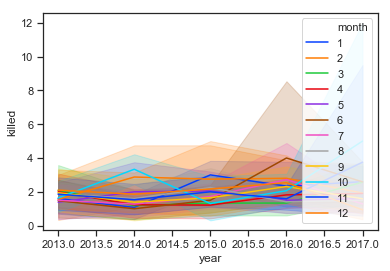

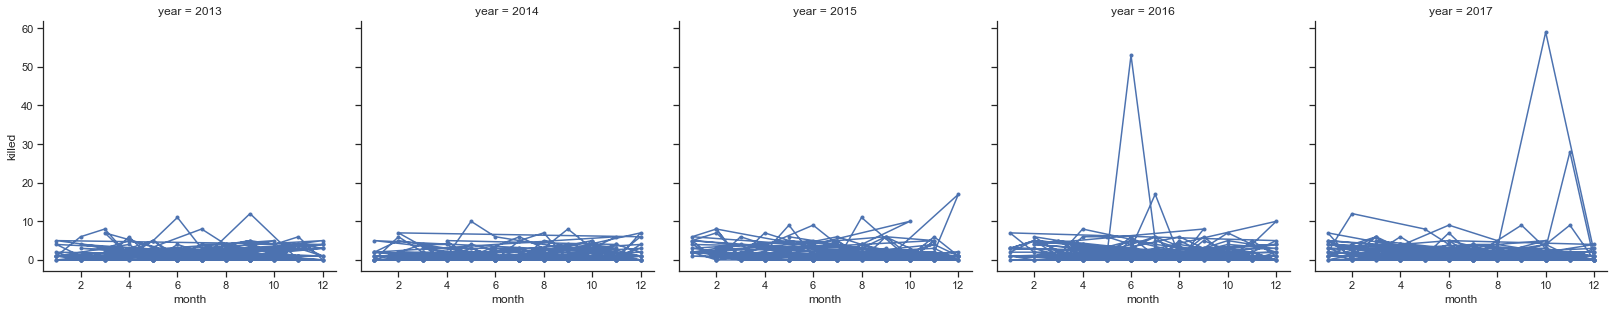

In [26]:
filtered_shooting_sales_per_pop_df = gunsale_population_by_shooting.groupby(['state', 'year', 'month'],as_index=False)[['killed', 'injured']].sum()
filtered_shooting_sales_per_pop_df


palette = sns.color_palette("bright", 12)
sns.lineplot(x="year", y="killed",
    hue="month", palette = palette,
    data=filtered_shooting_sales_per_pop_df)

g = sns.FacetGrid(filtered_shooting_sales_per_pop_df, col="year", col_wrap=6, height=4.5)
g = g.map(plt.plot, "month", "killed", marker=".")



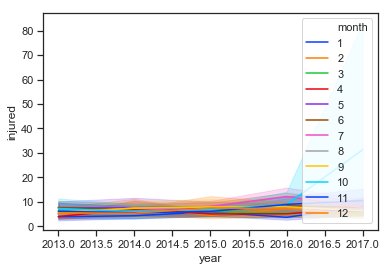

In [27]:
palette = sns.color_palette("bright", 12)
sns.lineplot(x="year", y="injured",
    hue="month", palette = palette,
    data=filtered_shooting_sales_per_pop_df)

### Visualizing long gun distribution by population

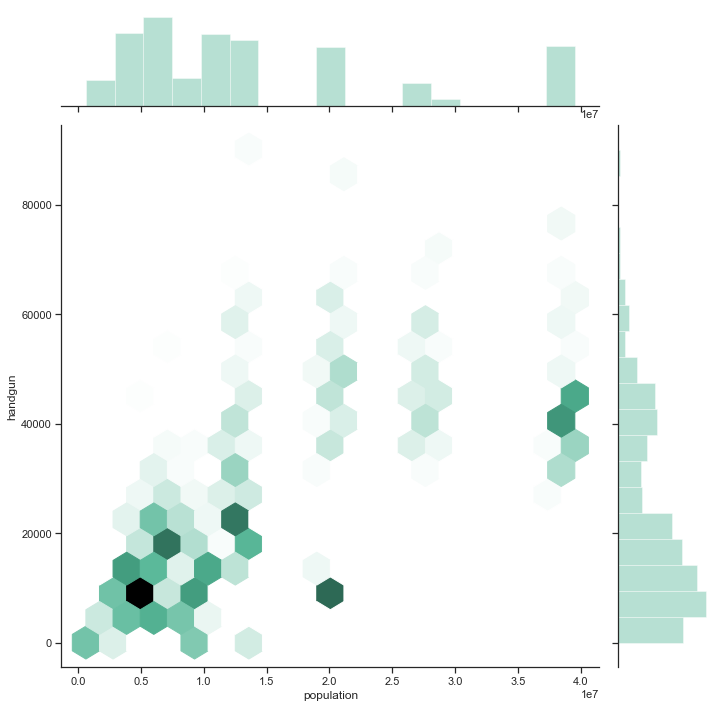

In [17]:
sns.set(style="ticks")
sns.jointplot(gunsale_population_by_shooting.population, gunsale_population_by_shooting.handgun, kind="hex", height=10, color="#4CB391")


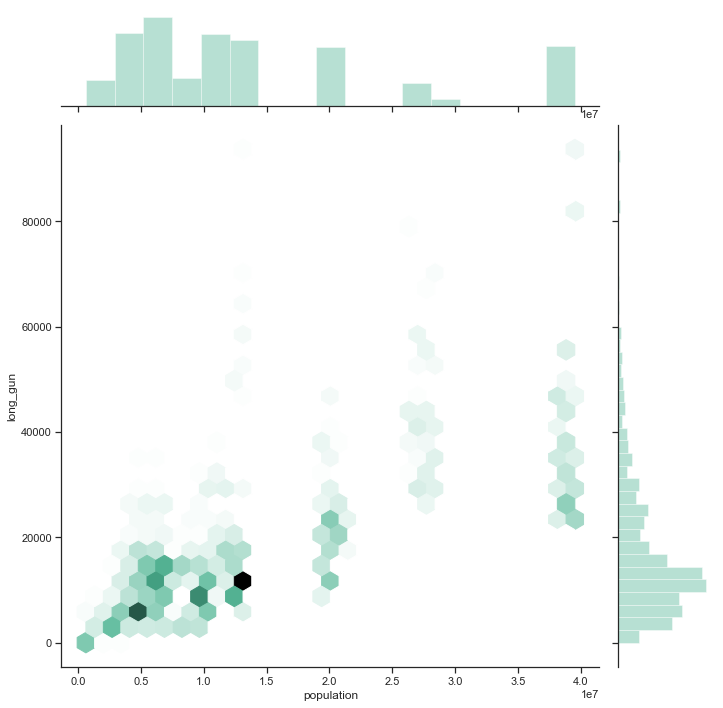

In [25]:
sns.jointplot(gunsale_population_by_shooting.population, gunsale_population_by_shooting.long_gun, kind="hex", height=10, color="#4CB391")

In [12]:
nst_est2017_allData.head()
filtered_shooting_sales_per_pop_df.head() 

,state,year,month,killed,injured
0,Alabama,2013,7,0,4
1,Alabama,2013,12,3,5
2,Alabama,2014,1,0,5
3,Alabama,2014,6,1,4
4,Alabama,2015,4,0,5


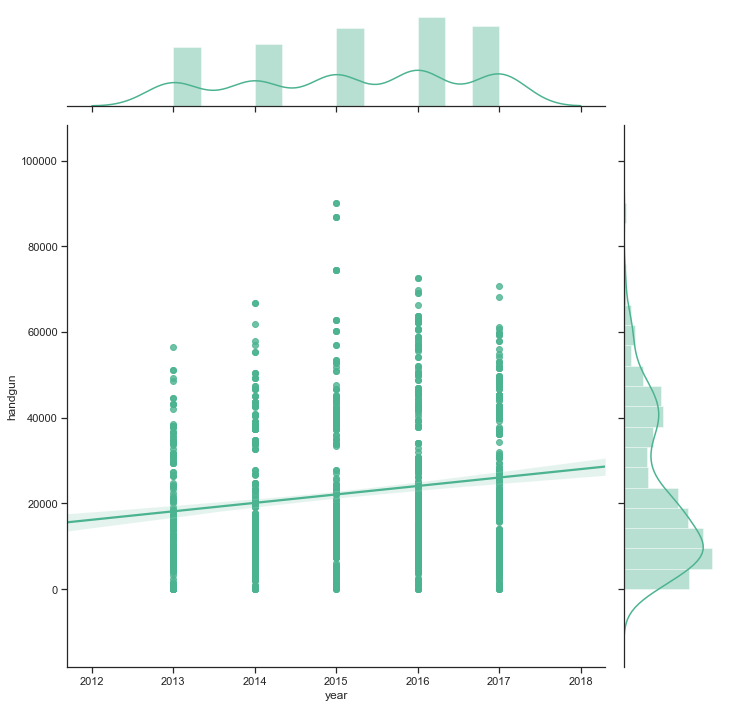

In [30]:
sns.jointplot(gunsale_population_by_shooting.year, gunsale_population_by_shooting.handgun, kind="reg", height=10, color="#4CB391")


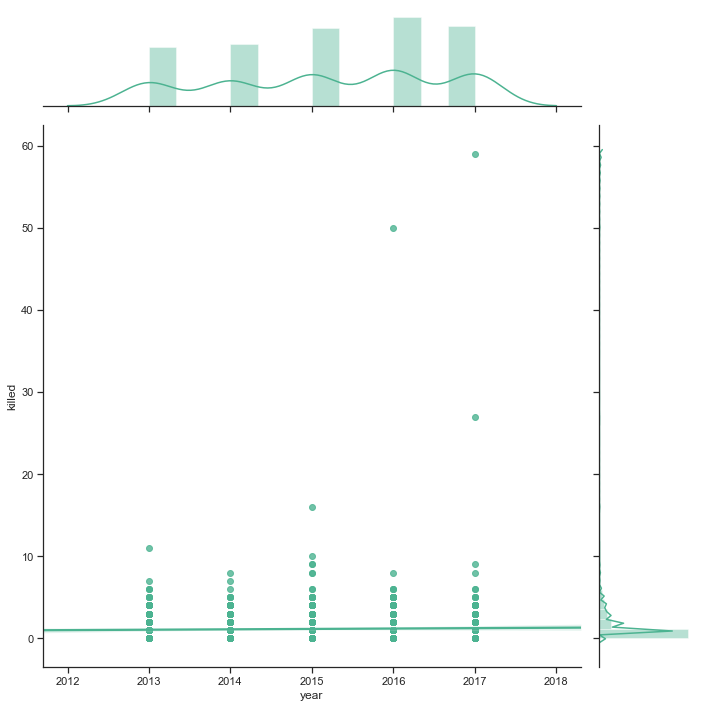

In [31]:
sns.jointplot(gunsale_population_by_shooting.year, gunsale_population_by_shooting.killed, kind="reg", height=10, color="#4CB391")


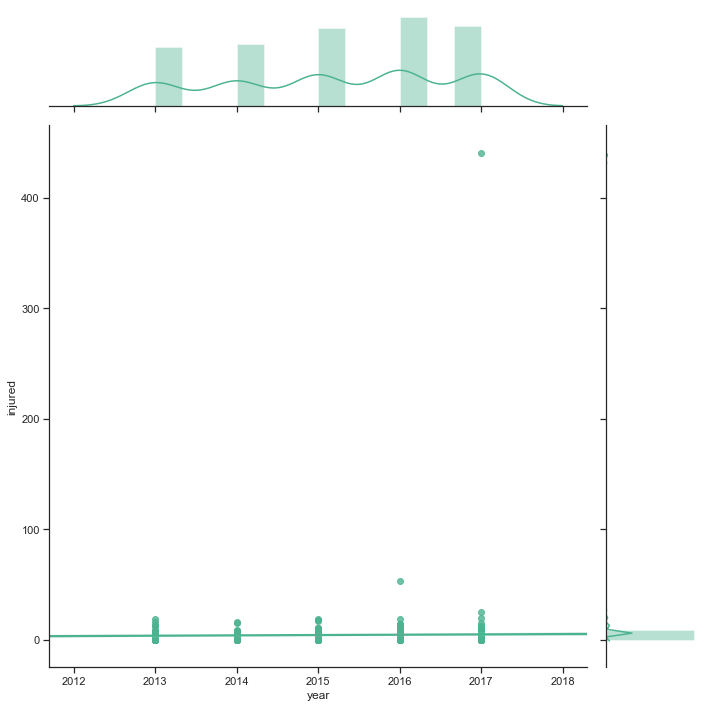

In [32]:
sns.jointplot(gunsale_population_by_shooting.year, gunsale_population_by_shooting.injured, kind="reg", height=10, color="#4CB391")